# Exploring the Satellite Imagery in Python

### Importing the image

In [1]:
import math
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import imsave as save_image

image_file = 'S2B_608.tif'
sat_data = rasterio.open(image_file)

In [2]:
print(sat_data.count)

# sequence of band indexes
print(sat_data.indexes)

13
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)


In [3]:
class satellite_file(object):
    def __init__(self,image_path_file):
        self.sat_data = rasterio.open(image_file)
        self.band_blue, self.band_green, self.band_red, self.band_nir, self.band_red_edge= self.sat_data.read([2,3,4,8,6])
#         self.band_green = self.sat_data.read([3])
#         self. band_red = self.sat_data.read([4])
#         self.band_nir = self.sat_data.read([8])
#         self.band_red_edge = sat_data.read([6])
        self.meta = self.sat_data.meta
        self.eps=1e-8
#     def red(self):
#         return self.band_red
#     def green(self):
#         return self.band_green
#     def blue(self):
#         return self.band_blue
    def to_ndvi(self):           # Make sure not to divide 0
        ndvi = (self.band_nir.astype(float) - self.band_red.astype(float)) / (self.band_nir + self.band_red + self.eps)
        return ndvi
    def to_ndre(self):
        ndre = (self.band_nir.astype(float) - self.red_edge.astype(float)) / (self.band_nir + self.red_edge + self.eps)
    def to_gndvi(self):
        gndvi = (self.band_nir.astype(float) - self.band_green.astype(float)) / (self.band_nir + self.band_green + self.eps)
        return gndvi
    def to_bndvi(self):
        bndvi = (self.band_nir.astype(float) - self.band_blue.astype(float)) / (self.band_nir + self.band_blue + self.eps)    
        return bndvi
    def to_osavi(self):
        osavi = (self.band_nir.astype(float) - self.band_red.astype(float)) / (self.band_nir + self.band_red +0.16)
        return osavi
    def save(self,image,path,count_band):
         # get the dtype of our image array:
        dtype = image.dtype
        # set the source metadata as kwargs we'll use to write the new data:
        kwargs = self.meta

        # update the 'dtype' value to match our NDVI array's dtype:
        kwargs.update(dtype=dtype)

        # update the 'count' value since our output will no longer be a 13-band image:
        kwargs.update(count = count_band)

        # Finally, use rasterio to write new raster file 'data/ndvi.tif':
        with rasterio.open(path, 'w', **kwargs) as dst:
                dst.write(image)
        return x_norm
    def to_RGB_composite(self):
        red = normalize(self.band_red)
        green = normalize(self.band_green)
        blue = normalize(self.band_blue)
        rgb = np.dstack((red, green, blue))
        
        return rgb
    def to_CIR_composite(self):
        nir = normalize(self.band_nir)
        green = normalize(self.band_green)
        blue = normalize(self.band_blue)
        cir = np.dstack((nir, green, blue))

        return cir
def normalize(x, lower=0, upper=1):
    """Normalize an array to a given bound interval"""

    x_max = np.max(x)
    x_min = np.min(x)

    m = (upper - lower) / (x_max - x_min)
    x_norm = (m * (x - x_min)) + lower

    return x_norm


In [4]:
def split_image(image,x,y):
    #split image into x*y parts
    x_axis, y_axis, channel = image.shape
    split_image = {}
    list_image = []
    x_size = x_axis // x
    y_size = y_axis // y
    for i in range(x):
        for j in range(y):
            image_part = image[i*x_size:(i+1)*x_size-1, j*y_size:(j+1)*y_size-1]
            image_part_name = 'image'+str(i)+str(j)
            split_image[image_part_name] = image_part
            save_image(image_part_name+'.png',image_part)
            list_image.append(image_part)
    return split_image,list_image

In [5]:
image = satellite_file(image_file)

In [6]:
rgb = image.to_RGB_composite()

In [7]:
split_image, list_image = split_image(rgb,2,2)

/home/ducanh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  del sys.path[0]


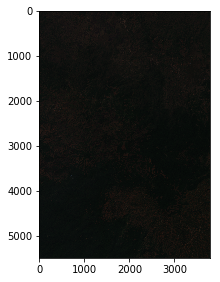

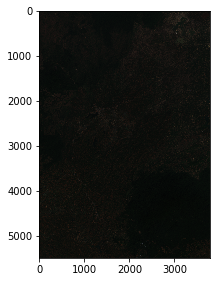

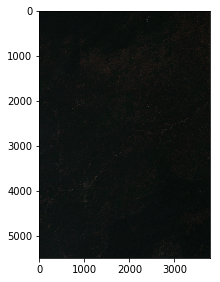

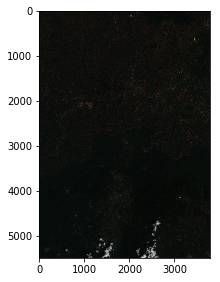

In [10]:
for i in range(1,5):
    plt.figure(figsize=(20,10))
    plt.subplot(220+i)
    plt.imshow(list_image[i-1])
plt.show()